# Exploratory Data Analysis: Reviews

One of our goals in this project is to creat sentiment score for each reviews, and use that as a predictor for listing income. To accomplish that, we need to know what positive/negative words are there in a sentence. But our data is unlabeled in nature, hence there is the need to use unsupervised learning algorithm to first categorize the data into (roughly) three groups of positive, negative and neutral sentiments. Our first step is then to understand what kinds of words exist in our data.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from re import sub

In [26]:
reviews = pd.read_csv('reviews.csv')
comments = reviews.comments.dropna()
comments.head()

0    Notre séjour de trois nuits.\r\nNous avons app...
1                                    Great experience.
2    I've stayed with my friend at the Midtown Cast...
3    We've been staying here for about 9 nights, en...
4    We had a wonderful stay at Jennifer's charming...
Name: comments, dtype: object

We see there are not only English comments in the dataset (which is normal considering the size of New York). For the purpose of analysis, we now drop the comments that are non-English:

In [16]:
def isEnglish(s):
    try:
        s.encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        return False
    else:
        return True

In [28]:
def clean(s):
    s = sub(r"[,!?.\/)('‘’“”+-:;–—\r\n\t\xa0]", " ", s)
    return (s)

comments = comments.apply(clean) # Perform data cleaning to avoid false positives

In [29]:
comments.loc[comments.apply(isEnglish)==False] # Non-English comments to be dropped

0          Notre séjour de trois nuits   Nous avons appré...
21         Tiene una ubicación excelente  Buen equipamien...
33         Jennifer es un anfitrión increíble  Siempre es...
53         Lisa était sympa  toujours prête à aider  L ét...
58         Bien que la chambre soit défraichi  nous avons...
63         Han sido unos días muy agradables  La casa est...
69         Alla fine tutto è bene ciò che finisce bene   ...
72         La descripción del departamento es absolutamen...
73         Je suis très heureux de mon séjour  accueil ch...
90         Estuvo todo perfecto  El barrio es muy lindo  ...
95         Super séjour à Brooklyn  L appartement est bie...
102        L appartement est tel que décrit   propre et a...
103        Quartier agréable a   mn de métro de manhattan...
104        Quartier très calme et agréable  L appartement...
106        Le logement est conforme aux photos et très ag...
112        Lisa Roxanne nous a très bien reçus  Elle est ...
120        Lisa nous att

Some reviews contain emoji's that are hard to detect using regular expression. We decide to drop them nonetheless, as our false discovery rate should be low anyways.

In [ ]:
eng_comments = comments.loc[comments.apply(isEnglish)]
text = eng_comments.str.cat(sep = ' ').lower()

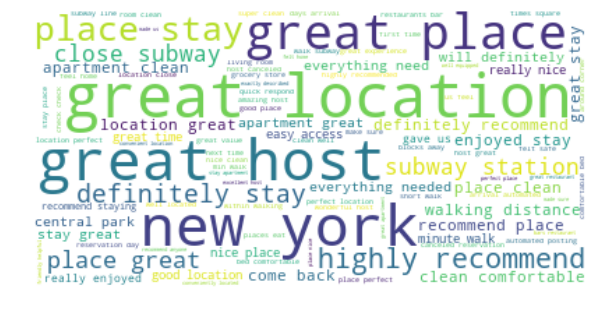

In [19]:
wc = WordCloud(background_color="white", repeat=False, stopwords=set(STOPWORDS))
wc.generate(text)

fig = plt.figure(figsize = (10,10))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
fig.savefig('wordcloud.png', dpi = fig.dpi)
plt.show()

Finally, we managed to pull a word cloud, which gives us an intuition of the distribution of words.

- Positive: There is a majority of good words such as 'great host', 'great location', 'recommend', 'clean';

- Neutral: There are neutral words featuring objective things such as 'New York', 'subway station', 'central park';

- Negative: The frequency of bad words is low. Though, we found posts like below which supposingly conveys negative emotions:

In [33]:
comments[1255305]

'The host canceled this reservation    days before arrival  This is an automated posting '